In [1]:
import warnings
warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
#Adding different colors for the Plots
c = 'b','r','g','c','m','y','k','w'
c1 = '#FF0000','#00FF00','#0000FF','#00FFFF','#FF00FF','#FFFF00','#000000','#FFFFFF'
c2 = '#0072BD','#D95319','#EDB120','#7E2F8E','#77AC30','#4DBEEE','#A2142F'

## Data Import

In [3]:
data = pd.read_csv('Indian House Prices.csv')
data.head()

,Unnamed: 0,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,...,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,City,Latitude,Longitude
0,0,300.00,3340,JP Nagar Phase 1,4.0,0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Banglore,12.265594,76.646540
1,1,83.58,1675,Doddanekundi,3.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Banglore,12.971319,77.696477
2,2,68.45,1670,Kengeri,3.0,0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Banglore,12.917657,77.483757
3,3,67.97,1220,Horamavu,2.0,0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Banglore,13.027331,77.660151
4,4,200.00,2502,Thanisandra,4.0,0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Banglore,13.054713,77.633926


## Lets Analyze the Dataset First

In [4]:
display(data.head())
print()
display(data.tail())

,Unnamed: 0,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,...,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,City,Latitude,Longitude
0,0,300.00,3340,JP Nagar Phase 1,4.0,0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Banglore,12.265594,76.646540
1,1,83.58,1675,Doddanekundi,3.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Banglore,12.971319,77.696477
2,2,68.45,1670,Kengeri,3.0,0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Banglore,12.917657,77.483757
3,3,67.97,1220,Horamavu,2.0,0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Banglore,13.027331,77.660151
4,4,200.00,2502,Thanisandra,4.0,0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Banglore,13.054713,77.633926


,Unnamed: 0,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,...,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,City,Latitude,Longitude
9385,24599,620.0,1450,Worli,3.0,0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Mumbai,19.011696,72.818070
9386,24600,25.0,540,Virar East,1.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Mumbai,19.457969,72.814214
9387,24601,190.0,1267,Belapur,3.0,1,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Mumbai,29.363160,80.723436
9388,24602,149.0,1245,Airoli,2.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Mumbai,29.656246,79.432182
9389,24603,140.0,1183,Airoli,2.0,0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Mumbai,29.656246,79.432182


In [5]:
data.shape

(9390, 44)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9390 entries, 0 to 9389
Data columns (total 44 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           9390 non-null   int64  
 1   Price                9390 non-null   float64
 2   Area                 9390 non-null   int64  
 3   Location             9390 non-null   object 
 4   No. of Bedrooms      9390 non-null   float64
 5   Resale               9390 non-null   int64  
 6   MaintenanceStaff     9390 non-null   float64
 7   Gymnasium            9390 non-null   float64
 8   SwimmingPool         9390 non-null   float64
 9   LandscapedGardens    9390 non-null   float64
 10  JoggingTrack         9390 non-null   float64
 11  RainWaterHarvesting  9390 non-null   float64
 12  IndoorGames          9390 non-null   float64
 13  ShoppingMall         9390 non-null   float64
 14  Intercom             9390 non-null   float64
 15  SportsFacility       9390 non-null   f

In [7]:
data.describe()

,Unnamed: 0,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,Latitude,Longitude
count,9390.000000,9390.000000,9390.000000,9390.000000,9390.000000,9390.000000,9390.000000,9390.000000,9390.000000,9390.000000,...,9390.000000,9390.000000,9390.000000,9390.000000,9390.000000,9390.000000,9390.000000,9390.000000,9390.000000,9390.000000
mean,11149.285091,105.614563,1354.274973,2.472311,0.352183,0.171778,0.509904,0.405644,0.342279,0.320554,...,0.296166,0.049414,0.022258,0.056550,0.053248,0.051544,0.021832,0.051864,18.778749,74.315855
std,7292.839800,139.664066,719.154146,0.762603,0.477676,0.377208,0.499929,0.491042,0.474498,0.466714,...,0.456589,0.216743,0.147528,0.230992,0.224540,0.221117,0.146142,0.221764,7.554944,18.613870
min,0.000000,20.000000,200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-28.816624,-117.147666
25%,5957.250000,45.000000,924.250000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.980165,77.036315
50%,10828.500000,70.000000,1200.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.451210,77.746994
75%,16088.750000,122.000000,1610.000000,3.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.227342,79.922469
max,24603.000000,4000.000000,9900.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,65.447377,127.655678


In [8]:
data['City'].value_counts().sort_values()

Kolkata        68
Mumbai       1302
Banglore     1708
Delhi        1989
Chennai      2047
Hyderabad    2276
Name: City, dtype: int64

# Data Cleaning.

## Now let's clean the Data.

In [9]:
data.columns

Index(['Unnamed: 0', 'Price', 'Area', 'Location', 'No. of Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', 'Wifi', 'Children'splayarea', 'LiftAvailable',
       'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV',
       'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator', 'City', 'Latitude',
       'Longitude'],
      dtype='object')

In [10]:
len(data.columns)

44

### Let's Drop not useful Columns.

In [11]:
Data = data[['City', 'Location', 'Area', 'No. of Bedrooms', 'CarParking', 'AC', 'Wifi', 'LiftAvailable', '24X7Security', 'Price']]
Data.head()

,City,Location,Area,No. of Bedrooms,CarParking,AC,Wifi,LiftAvailable,24X7Security,Price
0,Banglore,JP Nagar Phase 1,3340,4.0,0.0,0.0,0.0,1.0,1.0,300.00
1,Banglore,Doddanekundi,1675,3.0,0.0,0.0,0.0,1.0,0.0,83.58
2,Banglore,Kengeri,1670,3.0,1.0,0.0,0.0,1.0,1.0,68.45
3,Banglore,Horamavu,1220,2.0,1.0,0.0,0.0,1.0,1.0,67.97
4,Banglore,Thanisandra,2502,4.0,1.0,0.0,0.0,1.0,1.0,200.00


In [12]:
len(Data.columns)

10

### Column lenght reduces from 44 to 10.

### Let's Rename some columns.

In [13]:
Data.rename(columns={'Area':'total_sqft', 'Location':'Area', 'No. of Bedrooms':'BHK', 'CarParking':'Parking', 'LiftAvailable':'Lift', '24X7Security':'Security'}, inplace=True)
Data.head()

,City,Area,total_sqft,BHK,Parking,AC,Wifi,Lift,Security,Price
0,Banglore,JP Nagar Phase 1,3340,4.0,0.0,0.0,0.0,1.0,1.0,300.00
1,Banglore,Doddanekundi,1675,3.0,0.0,0.0,0.0,1.0,0.0,83.58
2,Banglore,Kengeri,1670,3.0,1.0,0.0,0.0,1.0,1.0,68.45
3,Banglore,Horamavu,1220,2.0,1.0,0.0,0.0,1.0,1.0,67.97
4,Banglore,Thanisandra,2502,4.0,1.0,0.0,0.0,1.0,1.0,200.00


### Adding an extra column for price per square feet.

In [14]:
Data['Price_per_sqft'] = (Data['Price']*100000/Data['total_sqft']).round()
Data.head()

,City,Area,total_sqft,BHK,Parking,AC,Wifi,Lift,Security,Price,Price_per_sqft
0,Banglore,JP Nagar Phase 1,3340,4.0,0.0,0.0,0.0,1.0,1.0,300.00,8982.0
1,Banglore,Doddanekundi,1675,3.0,0.0,0.0,0.0,1.0,0.0,83.58,4990.0
2,Banglore,Kengeri,1670,3.0,1.0,0.0,0.0,1.0,1.0,68.45,4099.0
3,Banglore,Horamavu,1220,2.0,1.0,0.0,0.0,1.0,1.0,67.97,5571.0
4,Banglore,Thanisandra,2502,4.0,1.0,0.0,0.0,1.0,1.0,200.00,7994.0


### Column Inspection

In [15]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9390 entries, 0 to 9389
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   City            9390 non-null   object 
 1   Area            9390 non-null   object 
 2   total_sqft      9390 non-null   int64  
 3   BHK             9390 non-null   float64
 4   Parking         9390 non-null   float64
 5   AC              9390 non-null   float64
 6   Wifi            9390 non-null   float64
 7   Lift            9390 non-null   float64
 8   Security        9390 non-null   float64
 9   Price           9390 non-null   float64
 10  Price_per_sqft  9390 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 807.1+ KB


In [16]:
Data.City.unique()

array(['Banglore', 'Chennai', 'Delhi', 'Hyderabad', 'Kolkata', 'Mumbai'],
      dtype=object)

#### BHK, Parking, AC, Wifi, Lift and Security is float data-type so we should change it into integer.

In [17]:
Data[['BHK', 'Parking', 'AC', 'Wifi', 'Lift', 'Security']] = Data[['BHK', 'Parking', 'AC', 'Wifi', 'Lift', 'Security']].apply(lambda x: pd.to_numeric(x, downcast='integer'))
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9390 entries, 0 to 9389
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   City            9390 non-null   object 
 1   Area            9390 non-null   object 
 2   total_sqft      9390 non-null   int64  
 3   BHK             9390 non-null   int8   
 4   Parking         9390 non-null   int8   
 5   AC              9390 non-null   int8   
 6   Wifi            9390 non-null   int8   
 7   Lift            9390 non-null   int8   
 8   Security        9390 non-null   int8   
 9   Price           9390 non-null   float64
 10  Price_per_sqft  9390 non-null   float64
dtypes: float64(2), int64(1), int8(6), object(2)
memory usage: 421.9+ KB


In [18]:
Data[['BHK', 'Parking', 'AC', 'Wifi', 'Lift', 'Security']]

,BHK,Parking,AC,Wifi,Lift,Security
0,4,0,0,0,1,1
1,3,0,0,0,1,0
2,3,1,0,0,1,1
3,2,1,0,0,1,1
4,4,1,0,0,1,1
...,...,...,...,...,...,...
9385,3,1,0,1,1,1
9386,1,0,0,0,0,0
9387,3,1,0,0,1,1
9388,2,1,0,0,1,0


#### Now the Datatypes are in Integer form.

### Let's Check for Null values using missingno mudole.

<AxesSubplot:>

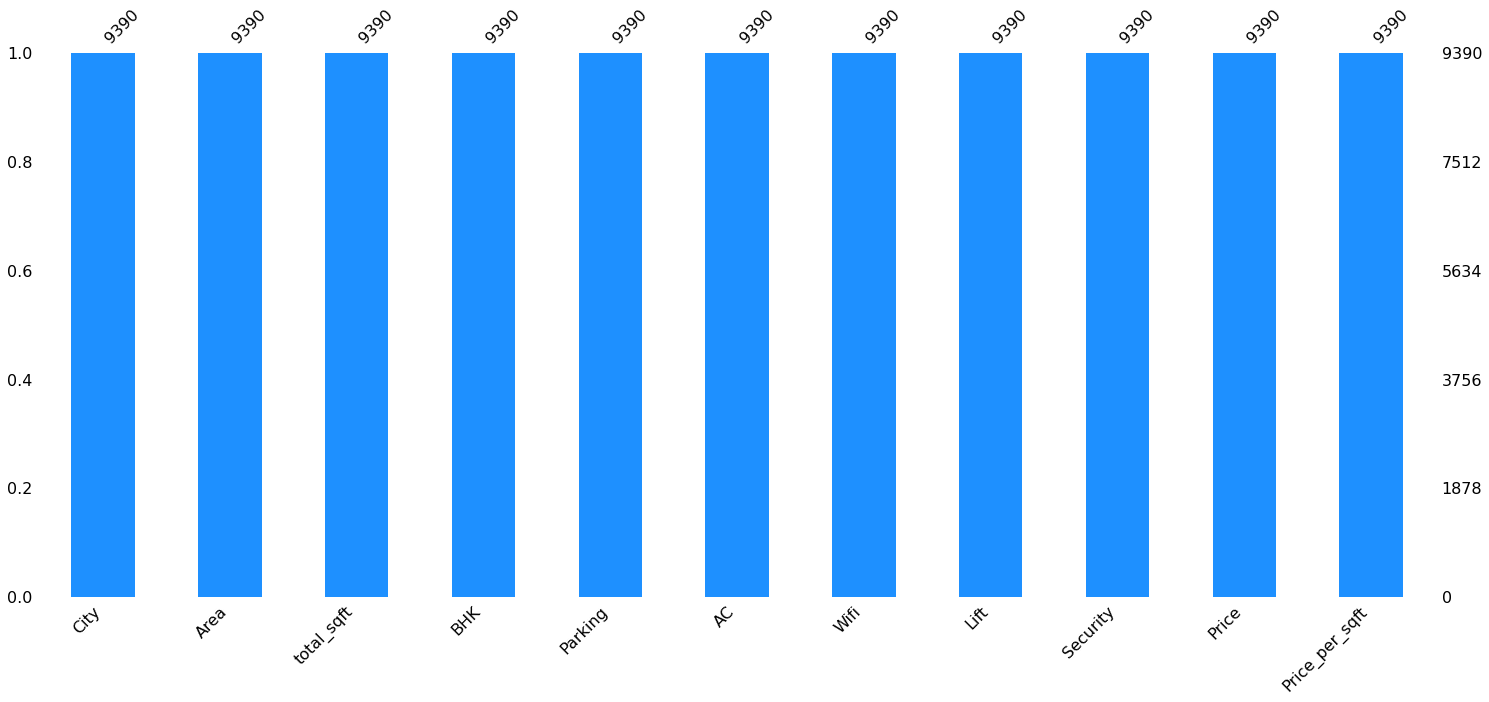

In [19]:
msno.bar(Data, color='dodgerblue')

<AxesSubplot:>

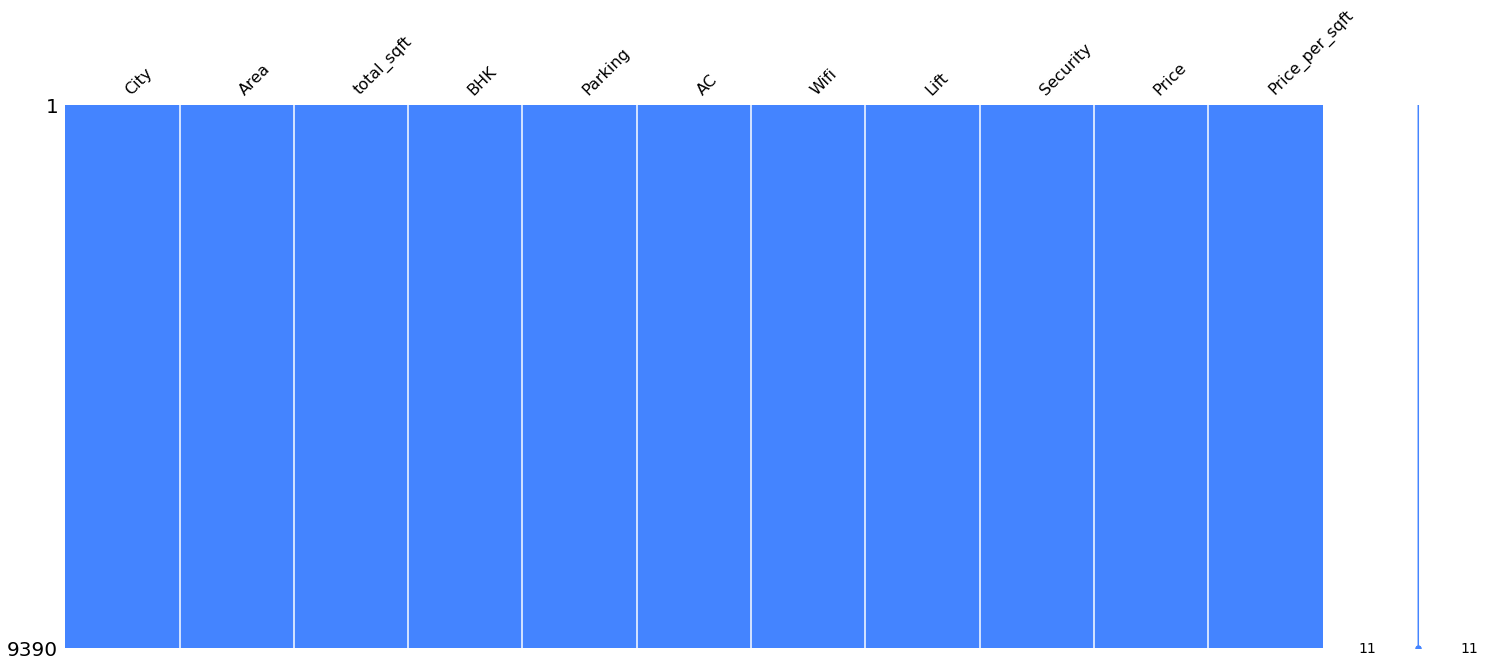

In [20]:
msno.matrix(Data, color=(0.27, 0.52, 1.0))

### It's good to see that there is no null values in this Dataset.

### Now let's Check for the outliers.

In [21]:
Data.columns

Index(['City', 'Area', 'total_sqft', 'BHK', 'Parking', 'AC', 'Wifi', 'Lift',
       'Security', 'Price', 'Price_per_sqft'],
      dtype='object')

In [22]:
Data.sort_values(by=['Price'], ascending=False).head(20)

,City,Area,total_sqft,BHK,Parking,AC,Wifi,Lift,Security,Price,Price_per_sqft
8992,Mumbai,Worli,3638,4,1,1,0,1,1,4000.0,109951.0
8926,Mumbai,Lower Parel,5476,5,1,0,0,1,1,3600.0,65741.0
8941,Mumbai,Lower Parel,5476,5,1,0,0,1,1,3600.0,65741.0
8960,Mumbai,Lower Parel,5476,5,1,0,0,1,1,3600.0,65741.0
766,Banglore,Hebbal,9900,5,1,0,0,0,1,2027.0,20475.0
9306,Mumbai,Tardeo,3000,4,1,1,1,1,1,2000.0,66667.0
764,Banglore,Hebbal,9700,5,1,0,0,0,1,1986.0,20474.0
2982,Chennai,Nungambakkam,7240,5,0,0,0,1,0,1900.0,26243.0
753,Banglore,Hebbal,8902,5,1,0,0,0,1,1823.0,20479.0
8906,Mumbai,juhu tara,2200,3,1,1,0,1,1,1800.0,81818.0


#### When we analyze the Price and BHK column carefully, we understand that they don't have outliers because the 4 and 5 bhk houses are expensive in these cities.

In [23]:
Data[Data['total_sqft']/Data['BHK']<300].head()

,City,Area,total_sqft,BHK,Parking,AC,Wifi,Lift,Security,Price,Price_per_sqft
1404,Banglore,Bommasandra,1055,4,1,0,0,1,0,41.00,3886.0
2002,Chennai,Perungalathur,572,2,0,0,0,1,0,22.59,3949.0
2076,Chennai,Thiruverkadu,570,2,1,0,0,1,0,25.00,4386.0
2295,Chennai,Ayapakkam,697,3,0,0,0,0,0,66.00,9469.0
2306,Chennai,Kolapakkam,590,2,0,0,0,0,0,29.82,5054.0


In [24]:
len(Data[Data['total_sqft']/Data['BHK']<300])

497

In [25]:
temp = Data[(Data['total_sqft']/Data['BHK']<300)]
temp.groupby('City')['Area'].count().sort_values(ascending=False)

City
Delhi        450
Mumbai        38
Chennai        5
Hyderabad      3
Banglore       1
Name: Area, dtype: int64

In [26]:
temp.shape

(497, 11)

In [27]:
Data.shape

(9390, 11)

In [28]:
Data = Data[~(Data['total_sqft']/Data['BHK']<300)]
Data.shape

(8893, 11)

In [29]:
display(len(data)-len(temp))

8893

### Average size for 1 BHK is 500 sqft and if its less than 300 sqft then it means the data is not relevant. that's why i drop those records.

In [30]:
Data['Price_per_sqft'].describe()

count      8893.000000
mean       7263.694704
std        5073.417997
min        2000.000000
25%        4517.000000
50%        5800.000000
75%        8357.000000
max      109951.000000
Name: Price_per_sqft, dtype: float64

<AxesSubplot:xlabel='Price_per_sqft'>

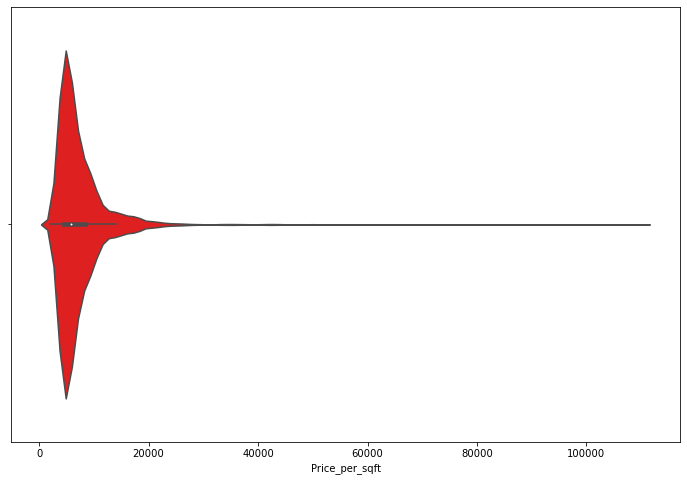

In [31]:
plt.figure(figsize=(12,8))
sns.violinplot(Data['Price_per_sqft'], color='r')

In [32]:
Data.groupby('City')['Price_per_sqft'].mean().sort_values(ascending=False)

City
Mumbai       12732.715190
Delhi         8412.756335
Chennai       6246.797747
Banglore      5784.111306
Hyderabad     5549.775187
Kolkata       4567.279412
Name: Price_per_sqft, dtype: float64

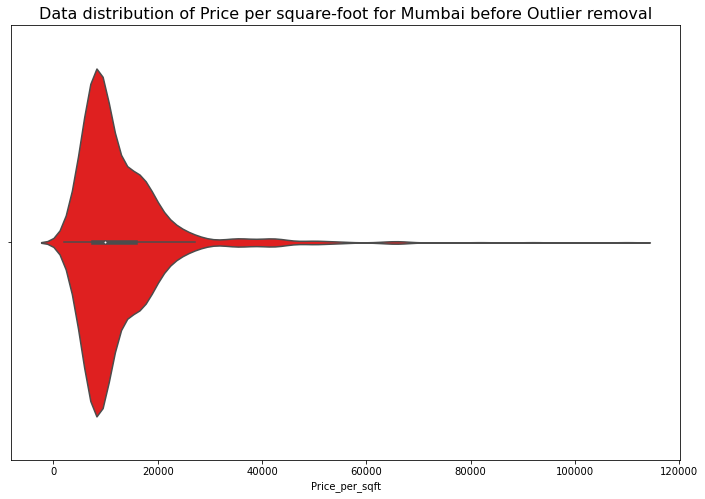

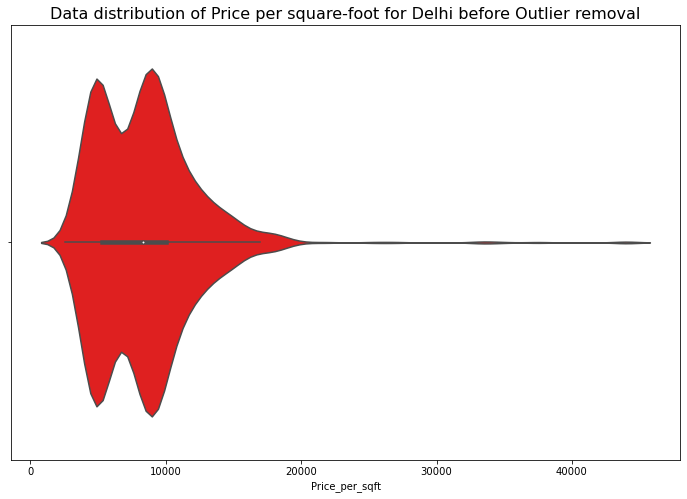

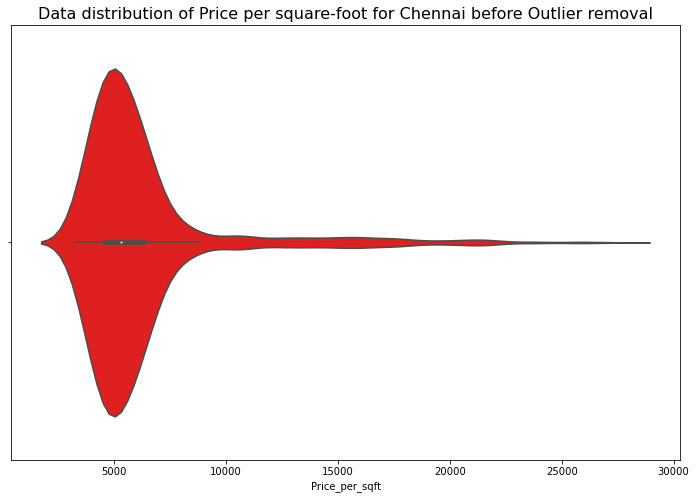

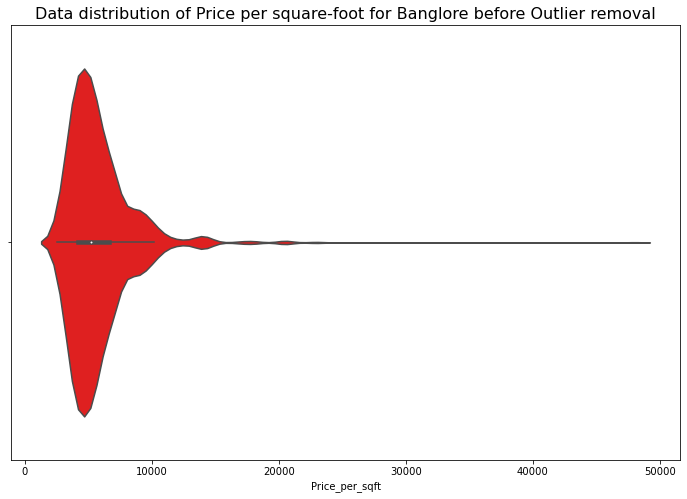

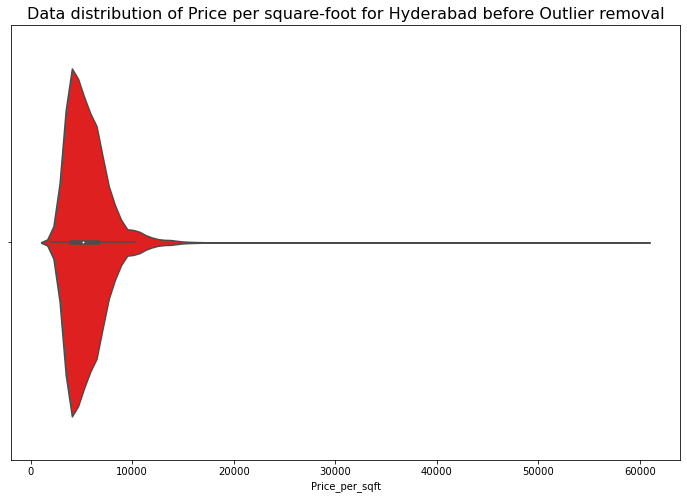

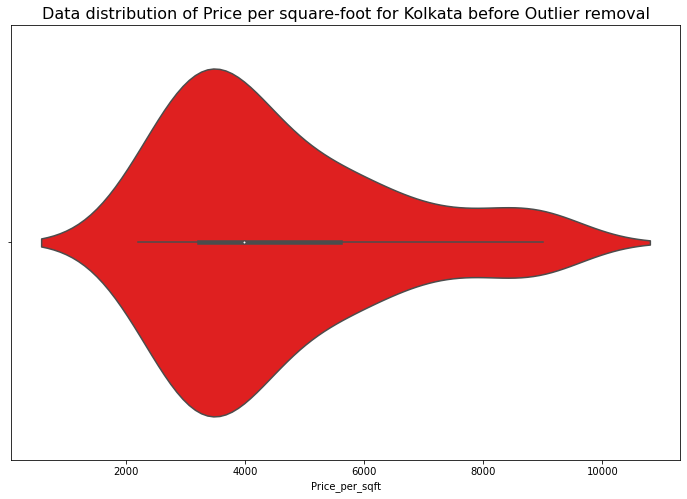

In [33]:
city = 'Mumbai', 'Delhi', 'Chennai', 'Banglore', 'Hyderabad', 'Kolkata'
for c in city:
    df = Data[(Data['City']==c)]
    plt.figure(figsize=(12,8))
    sns.violinplot(df['Price_per_sqft'], color='r')
    plt.title(f'Data distribution of Price per square-foot for {c} before Outlier removal', fontsize=16)

In [34]:
def remove_pps_outliers(Data):
    data_new = pd.DataFrame()
    for key, subdata in Data.groupby('City'):
        mean = np.mean(subdata.Price_per_sqft)
        std = np.std(subdata.Price_per_sqft)
        new = subdata[(subdata.Price_per_sqft>(mean-std)) & (subdata.Price_per_sqft<=(mean+std))]
        data_new = pd.concat([data_new,new], ignore_index=True)
    return data_new
Data = remove_pps_outliers(Data)
Data.shape

(7515, 11)

In [35]:
Data.shape

(7515, 11)

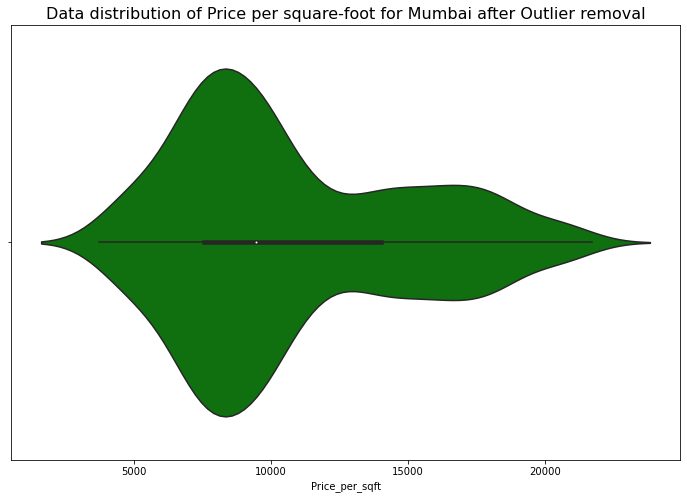

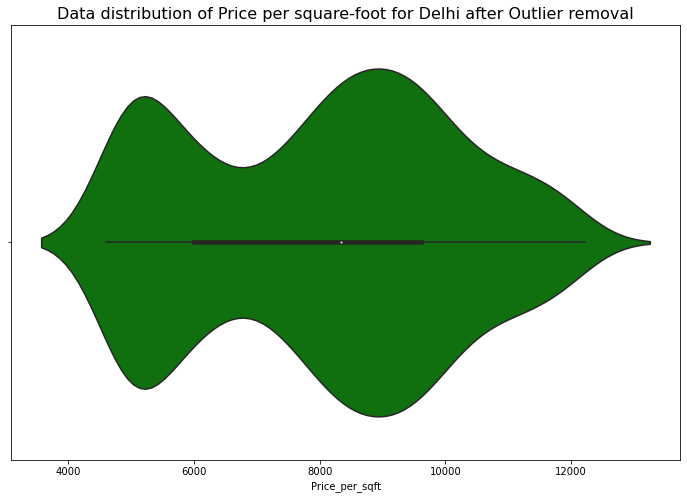

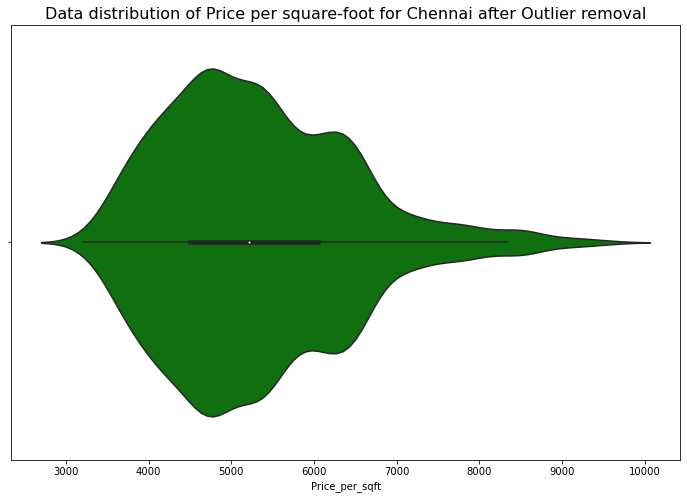

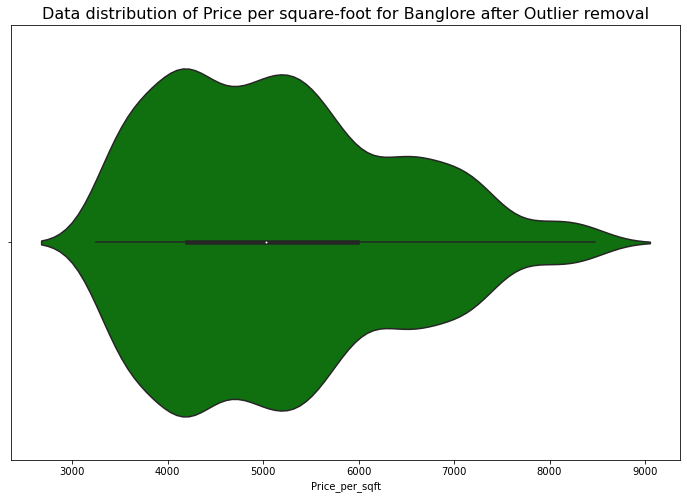

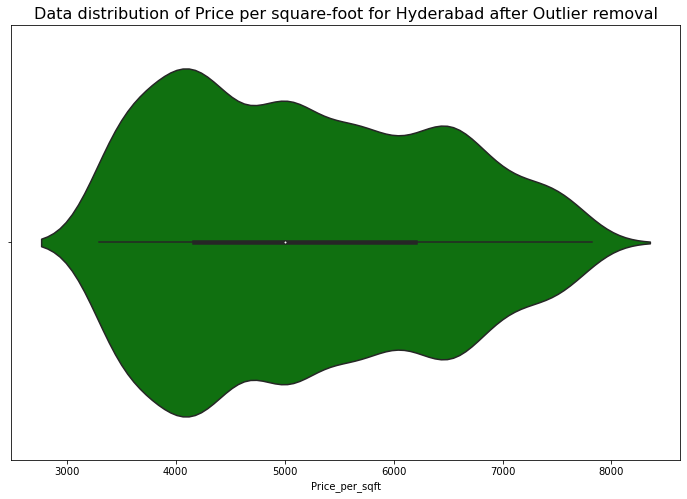

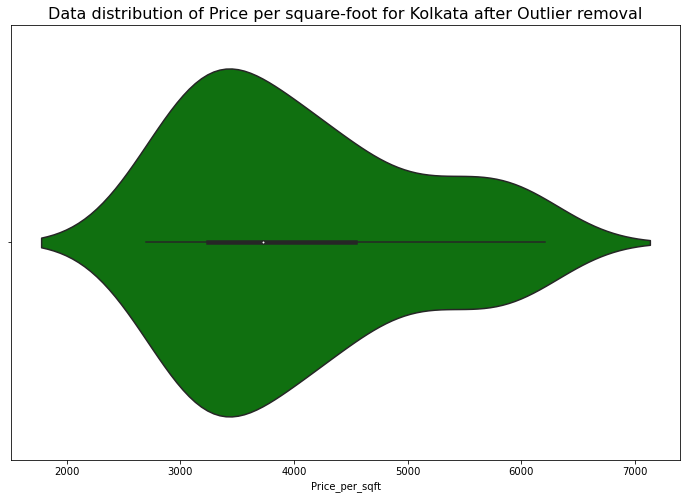

In [36]:
city = 'Mumbai', 'Delhi', 'Chennai', 'Banglore', 'Hyderabad', 'Kolkata'
for c in city:
    df = Data[(Data['City']==c)]
    plt.figure(figsize=(12,8))
    sns.violinplot(df['Price_per_sqft'], color='g')
    plt.title(f'Data distribution of Price per square-foot for {c} after Outlier removal', fontsize=16)

### Every City price per square foot is different that's why instead of removing outliers for the entire dataset, we first devide the data city wise then remove the outliers according to it.

In [37]:
Data.Area.value_counts().sort_values()

Koproli               1
Mayuri Nagar          1
Methodist Colony      1
Deonar                1
Adyar                 1
                   ... 
Medavakkam          120
Kondapur            122
RR Nagar            143
Kukatpally          155
Kharghar            322
Name: Area, Length: 629, dtype: int64

In [38]:
temp = Data['Area'].value_counts()
temp1=  temp[temp<10]
temp1

Goregaon East        9
Madhavaram           9
Chaitanyapuri        9
Palam                9
Bhiwandi             9
                    ..
chandrayangutta      1
Saidabad             1
Sector 18B Dwarka    1
Sector-14 Rohini     1
Koproli              1
Name: Area, Length: 441, dtype: int64

### We can see that among 629 unique values for Area column, more than 441 values occur less than 10 so we will change them into outhers. It will help us when we perform One Hot Encoding.

In [39]:
Data['Area'] = Data['Area'].apply(lambda x: 'Other' if x in temp1 else x)
Data['Area'].value_counts()

Other              1259
Kharghar            322
Kukatpally          155
RR Nagar            143
Kondapur            122
                   ... 
Kachiguda            10
Periyapanicheri      10
Sector 10            10
Gandipet             10
Perambur             10
Name: Area, Length: 189, dtype: int64

In [40]:
len(Data['Area'].unique())

189

In [41]:
Data.tail(10)

,City,Area,total_sqft,BHK,Parking,AC,Wifi,Lift,Security,Price,Price_per_sqft
7505,Mumbai,Mira Road East,965,2,1,0,0,1,1,84.0,8705.0
7506,Mumbai,Mira Road East,965,2,1,0,0,1,1,74.3,7699.0
7507,Mumbai,Borivali East,1560,3,0,0,0,1,1,214.0,13718.0
7508,Mumbai,Goregaon West,1505,3,1,0,0,1,1,257.0,17076.0
7509,Mumbai,Other,450,1,0,0,1,1,1,21.0,4667.0
7510,Mumbai,Other,670,1,1,0,0,1,1,33.0,4925.0
7511,Mumbai,Other,540,1,0,0,0,0,0,25.0,4630.0
7512,Mumbai,Other,1267,3,1,0,0,1,1,190.0,14996.0
7513,Mumbai,Other,1245,2,1,0,0,1,0,149.0,11968.0
7514,Mumbai,Other,1183,2,1,0,0,1,1,140.0,11834.0


### Now we have transform all the Areas name to Other which occur less than 10 time. It will surely help us while building a model because after doing one hot encoding, we will have only 189 columns.

# Exploratary Data Analysis

In [42]:
Data.head()

,City,Area,total_sqft,BHK,Parking,AC,Wifi,Lift,Security,Price,Price_per_sqft
0,Banglore,Doddanekundi,1675,3,0,0,0,1,0,83.58,4990.0
1,Banglore,Kengeri,1670,3,1,0,0,1,1,68.45,4099.0
2,Banglore,Horamavu,1220,2,1,0,0,1,1,67.97,5571.0
3,Banglore,Thanisandra,2502,4,1,0,0,1,1,200.00,7994.0
4,Banglore,Ramamurthy Nagar,1438,3,1,0,0,1,1,71.05,4941.0


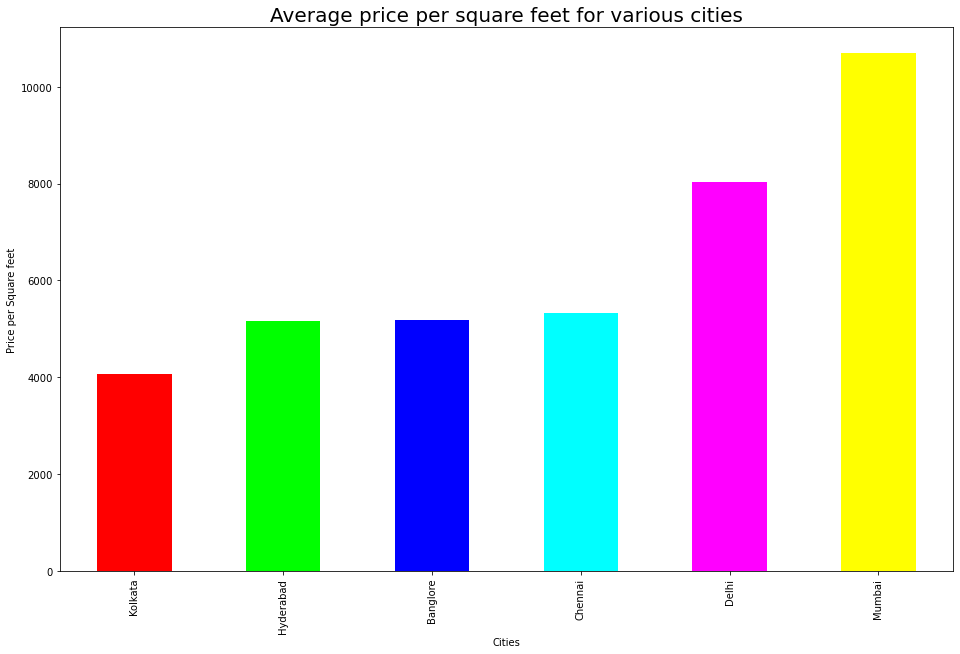

In [43]:
plt.figure(figsize=(16,10))
ax=Data.groupby(Data['City']) ['Price_per_sqft'].mean().sort_values().plot.bar(color=c1)
plt.gca().set(xlabel= 'Cities', ylabel= 'Price per Square feet')
ax.set_title('Average price per square feet for various cities', fontsize=20);

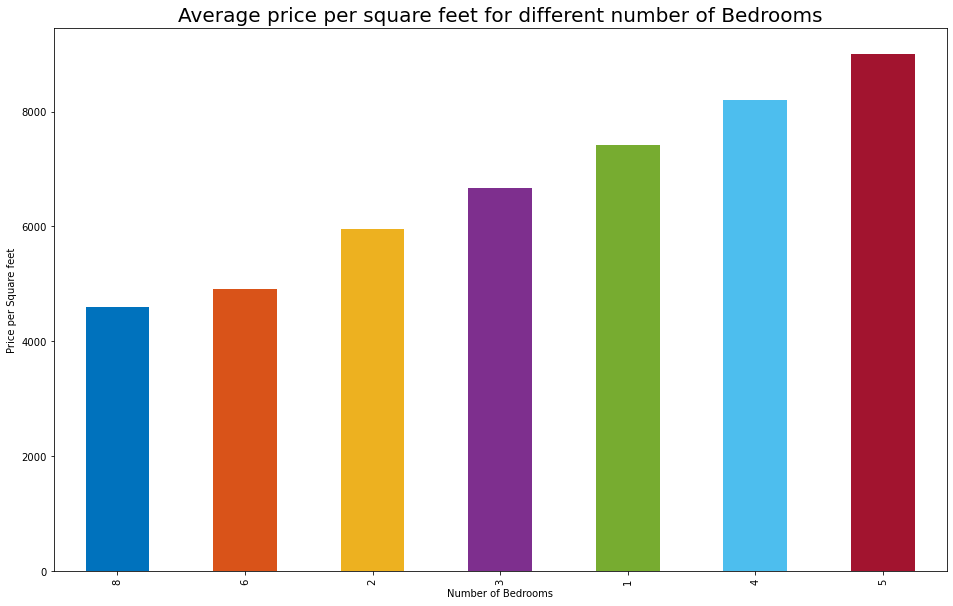

In [44]:
plt.figure(figsize=(16,10))
ax=Data.groupby(Data['BHK']) ['Price_per_sqft'].mean().sort_values().plot.bar(color=c2)
plt.gca().set(xlabel= 'Number of Bedrooms', ylabel= 'Price per Square feet')
ax.set_title('Average price per square feet for different number of Bedrooms', fontsize=20)
plt.show;

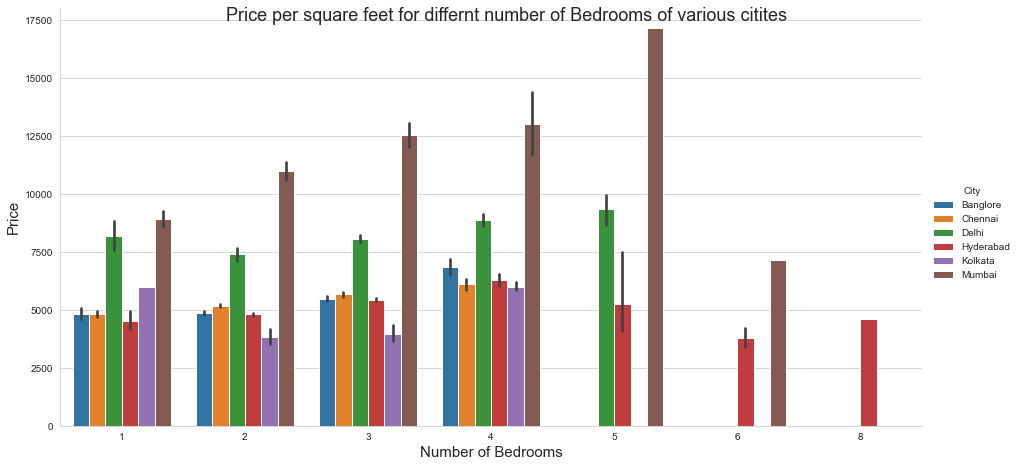

In [45]:
sns.set_style("whitegrid") # Background grid style
ax=sns.catplot(x='BHK', y='Price_per_sqft', data=Data, hue='City',kind='bar', height=6.5, aspect=2)

# For aesthetic purpose
ax.fig.suptitle('Price per square feet for differnt number of Bedrooms of various citites', fontsize=18);
ax.set_xlabels('Number of Bedrooms',fontsize=15);
ax.set_ylabels('Price',fontsize=15);

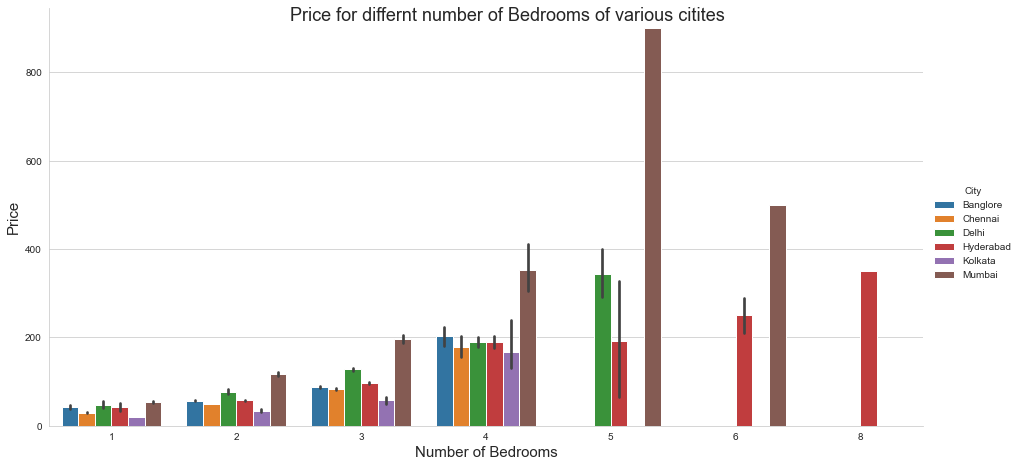

In [46]:
sns.set_style("whitegrid") # Background grid style
ax=sns.catplot(x='BHK', y='Price', data=Data, hue='City',kind='bar', height=6.5, aspect=2)

# For aesthetic purpose
ax.fig.suptitle('Price for differnt number of Bedrooms of various citites', fontsize=18);
ax.set_xlabels('Number of Bedrooms',fontsize=15);
ax.set_ylabels('Price',fontsize=15);

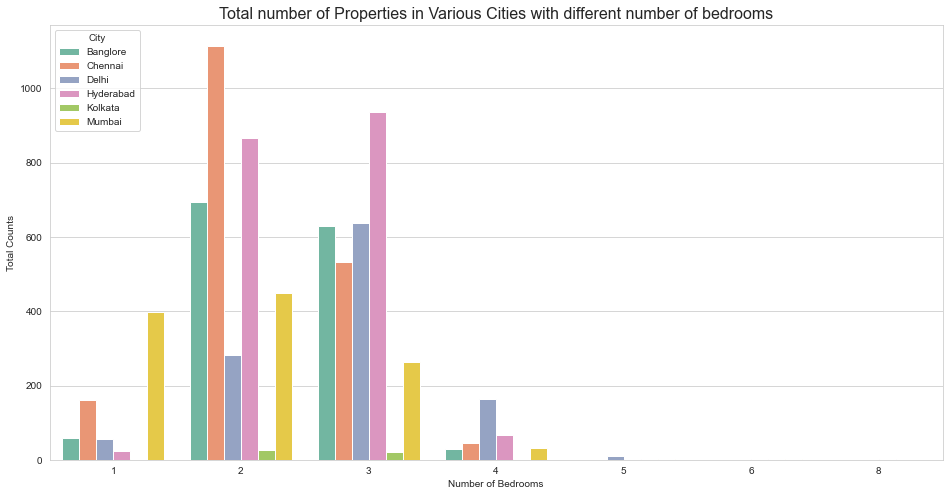

In [47]:
plt.figure(figsize=(16,8))
ax= sns.countplot(data=Data, x="BHK", hue="City", palette='Set2')
ax.set_title('Total number of Properties in Various Cities with different number of bedrooms', fontsize=16)
ax.set(xlabel='Number of Bedrooms', ylabel='Total Counts')
plt.show();

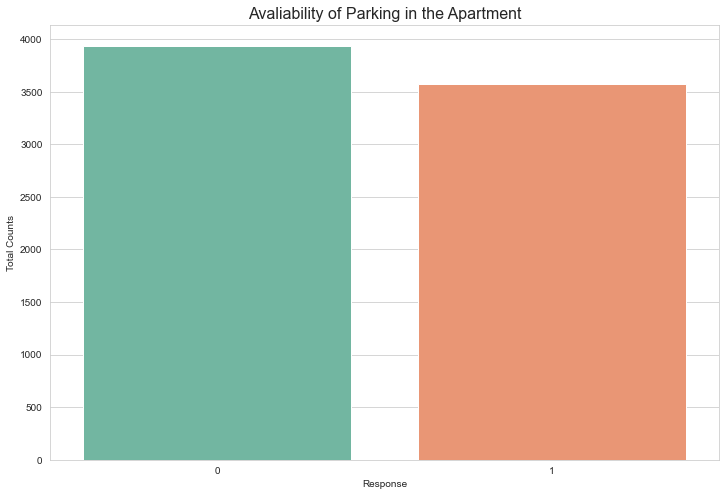

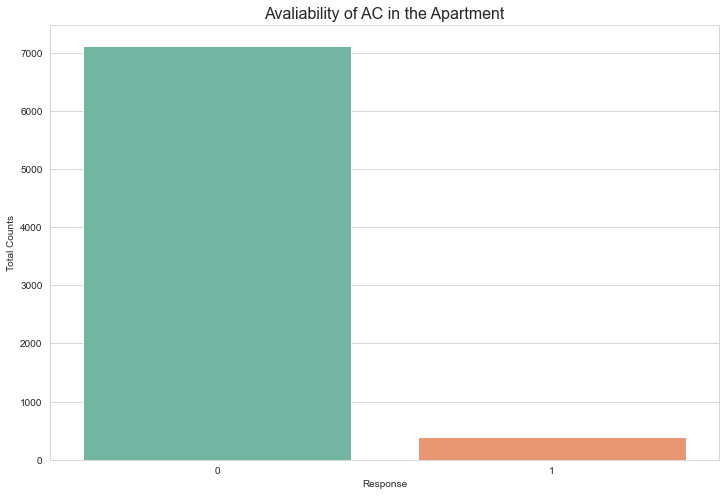

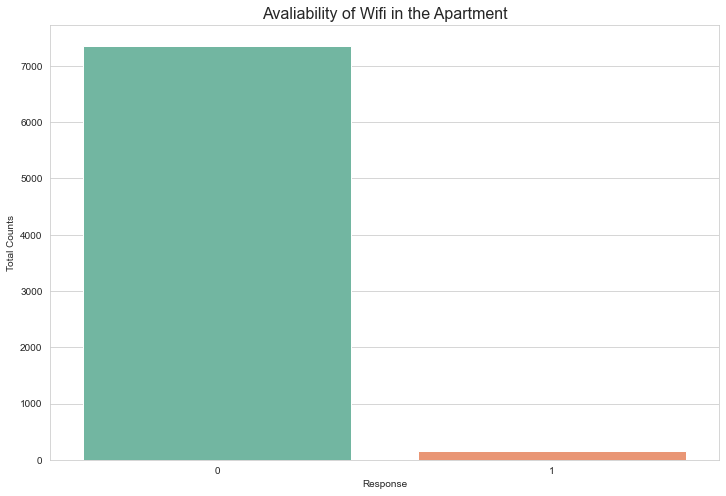

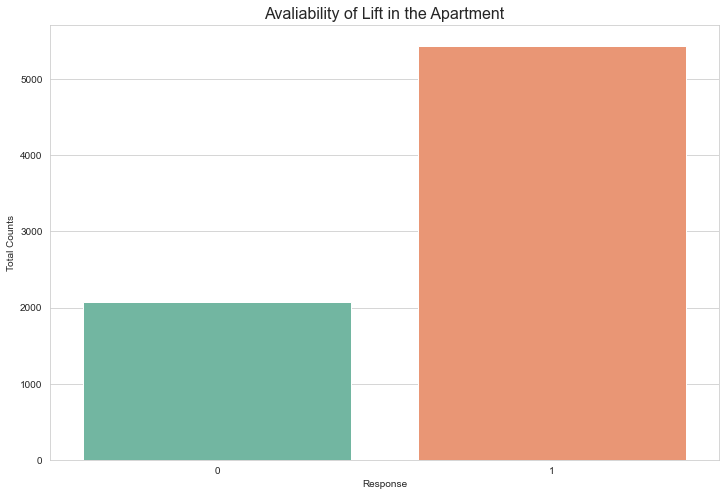

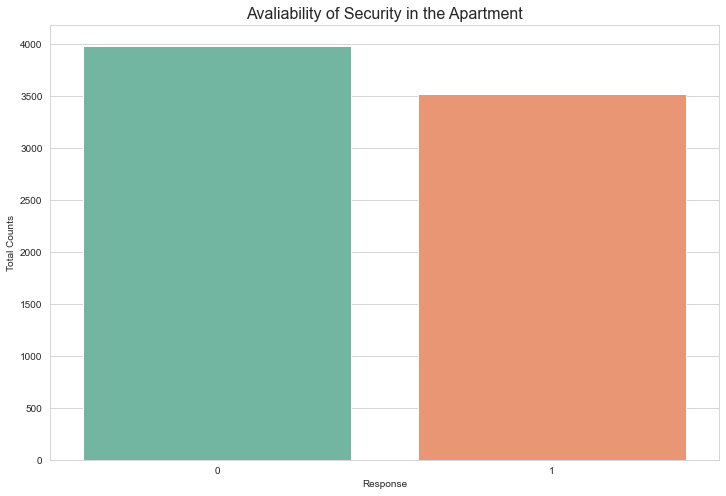

In [48]:
col = 'Parking', 'AC', 'Wifi', 'Lift', 'Security'
for col in col:
    
    plt.figure(figsize=(12,8))
    ax= sns.countplot(data=Data, x=col, palette='Set2')
    ax.set_title(f'Avaliability of {col} in the Apartment', fontsize=16)
    ax.set(xlabel='Response', ylabel='Total Counts')
    plt.show();

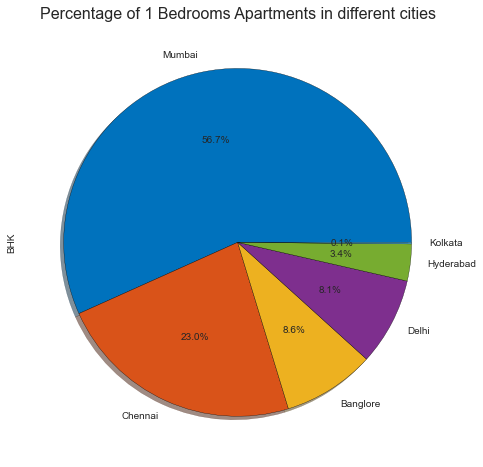

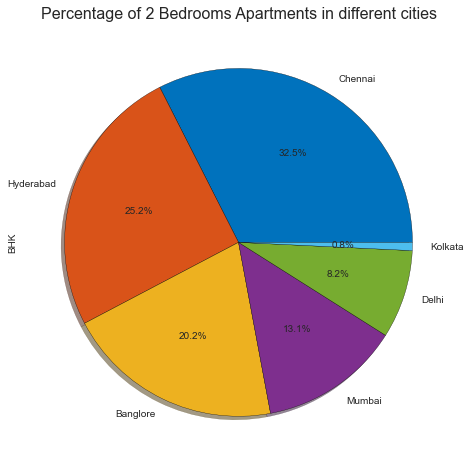

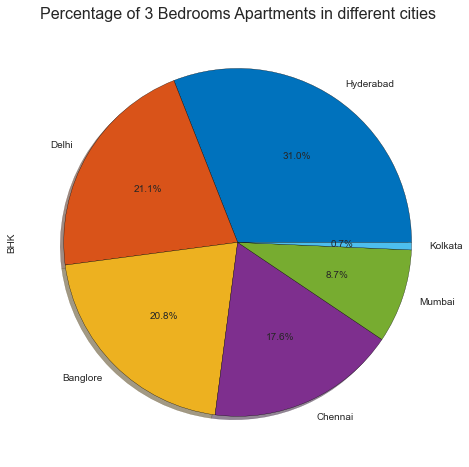

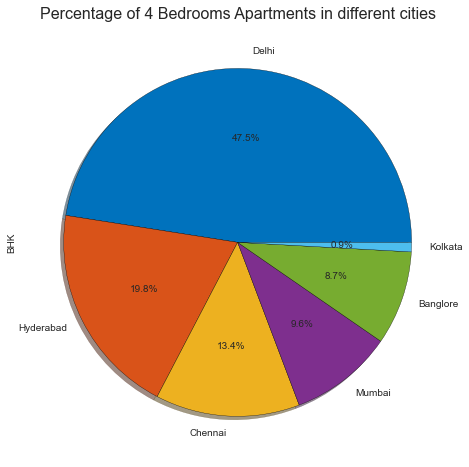

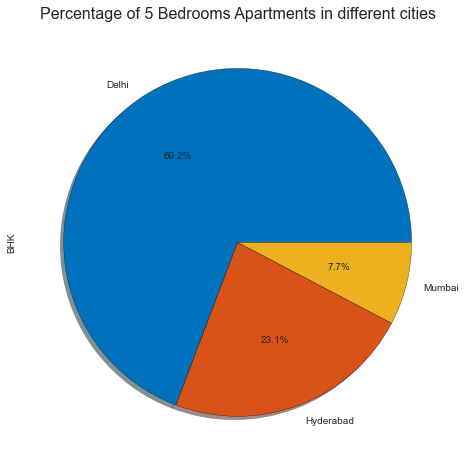

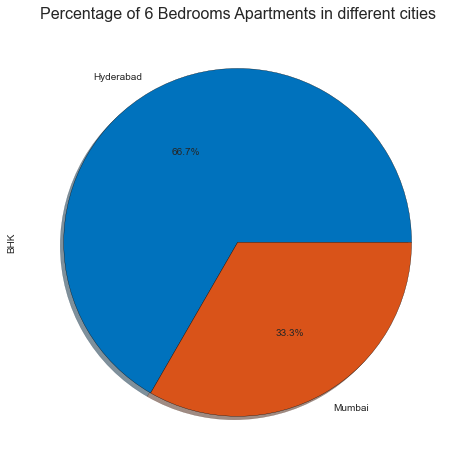

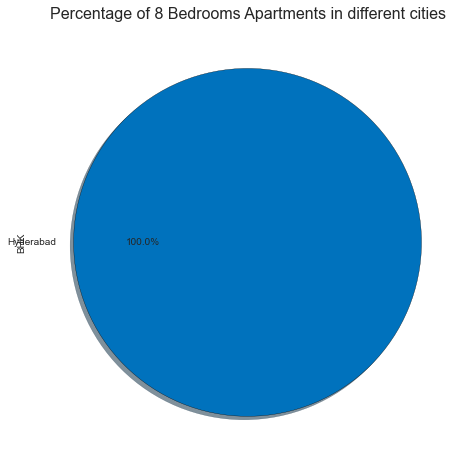

In [49]:
cols = 1,2,3,4,5,6,8
for col in cols:
    temp = Data[(Data['BHK']==col)]
    plt.figure(figsize=(12,8))
    x= temp.groupby('City')['BHK'].count().sort_values(ascending=False)
    x.reset_index('City')
    x[ :8].plot.pie(shadow=True, autopct='%1.1f%%', colors=c2, wedgeprops={'edgecolor':'black', 'linewidth':0.3})
    plt.title(f"Percentage of {col} Bedrooms Apartments in different cities", fontsize=16)


# Feature Enginering

In [50]:
Data

,City,Area,total_sqft,BHK,Parking,AC,Wifi,Lift,Security,Price,Price_per_sqft
0,Banglore,Doddanekundi,1675,3,0,0,0,1,0,83.58,4990.0
1,Banglore,Kengeri,1670,3,1,0,0,1,1,68.45,4099.0
2,Banglore,Horamavu,1220,2,1,0,0,1,1,67.97,5571.0
3,Banglore,Thanisandra,2502,4,1,0,0,1,1,200.00,7994.0
4,Banglore,Ramamurthy Nagar,1438,3,1,0,0,1,1,71.05,4941.0
...,...,...,...,...,...,...,...,...,...,...,...
7510,Mumbai,Other,670,1,1,0,0,1,1,33.00,4925.0
7511,Mumbai,Other,540,1,0,0,0,0,0,25.00,4630.0
7512,Mumbai,Other,1267,3,1,0,0,1,1,190.00,14996.0
7513,Mumbai,Other,1245,2,1,0,0,1,0,149.00,11968.0


In [51]:
city_dummy = pd.get_dummies(Data['City'])
city_dummy

,Banglore,Chennai,Delhi,Hyderabad,Kolkata,Mumbai
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
7510,0,0,0,0,0,1
7511,0,0,0,0,0,1
7512,0,0,0,0,0,1
7513,0,0,0,0,0,1


In [52]:
area_dummy = pd.get_dummies(Data['Area'])
area_dummy

,Alaknanda,Alwal,Ambattur,Aminpur,Anjanapura,Anna Nagar,Appa Junction,Attapur,Avadi,Avalahalli Off Sarjapur Road,...,Uttarahalli,Varthur,Vasant Kunj,Velachery,Vengaivasal,West Marredpally,West Tambaram,Whitefield Hope Farm Junction,Yelahanka,tambaram west
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7510,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7511,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7512,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7513,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
print(city_dummy.shape)
print('')
print(area_dummy.shape)

(7515, 6)

(7515, 189)


In [54]:
Data = pd.concat([Data, city_dummy, area_dummy], axis='columns')
Data.head(5)

,City,Area,total_sqft,BHK,Parking,AC,Wifi,Lift,Security,Price,...,Uttarahalli,Varthur,Vasant Kunj,Velachery,Vengaivasal,West Marredpally,West Tambaram,Whitefield Hope Farm Junction,Yelahanka,tambaram west
0,Banglore,Doddanekundi,1675,3,0,0,0,1,0,83.58,...,0,0,0,0,0,0,0,0,0,0
1,Banglore,Kengeri,1670,3,1,0,0,1,1,68.45,...,0,0,0,0,0,0,0,0,0,0
2,Banglore,Horamavu,1220,2,1,0,0,1,1,67.97,...,0,0,0,0,0,0,0,0,0,0
3,Banglore,Thanisandra,2502,4,1,0,0,1,1,200.00,...,0,0,0,0,0,0,0,0,0,0
4,Banglore,Ramamurthy Nagar,1438,3,1,0,0,1,1,71.05,...,0,0,0,0,0,0,0,0,0,0


In [55]:
Data = Data.drop(['City', 'Area'], axis='columns')
Data.head(5)

,total_sqft,BHK,Parking,AC,Wifi,Lift,Security,Price,Price_per_sqft,Banglore,...,Uttarahalli,Varthur,Vasant Kunj,Velachery,Vengaivasal,West Marredpally,West Tambaram,Whitefield Hope Farm Junction,Yelahanka,tambaram west
0,1675,3,0,0,0,1,0,83.58,4990.0,1,...,0,0,0,0,0,0,0,0,0,0
1,1670,3,1,0,0,1,1,68.45,4099.0,1,...,0,0,0,0,0,0,0,0,0,0
2,1220,2,1,0,0,1,1,67.97,5571.0,1,...,0,0,0,0,0,0,0,0,0,0
3,2502,4,1,0,0,1,1,200.00,7994.0,1,...,0,0,0,0,0,0,0,0,0,0
4,1438,3,1,0,0,1,1,71.05,4941.0,1,...,0,0,0,0,0,0,0,0,0,0


In [56]:
Data = Data.drop('Price_per_sqft', axis='columns')
Data

,total_sqft,BHK,Parking,AC,Wifi,Lift,Security,Price,Banglore,Chennai,...,Uttarahalli,Varthur,Vasant Kunj,Velachery,Vengaivasal,West Marredpally,West Tambaram,Whitefield Hope Farm Junction,Yelahanka,tambaram west
0,1675,3,0,0,0,1,0,83.58,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1670,3,1,0,0,1,1,68.45,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1220,2,1,0,0,1,1,67.97,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2502,4,1,0,0,1,1,200.00,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1438,3,1,0,0,1,1,71.05,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7510,670,1,1,0,0,1,1,33.00,0,0,...,0,0,0,0,0,0,0,0,0,0
7511,540,1,0,0,0,0,0,25.00,0,0,...,0,0,0,0,0,0,0,0,0,0
7512,1267,3,1,0,0,1,1,190.00,0,0,...,0,0,0,0,0,0,0,0,0,0
7513,1245,2,1,0,0,1,0,149.00,0,0,...,0,0,0,0,0,0,0,0,0,0


insights

training and testing

In [57]:
X = Data.drop('Price', axis='columns')
X

,total_sqft,BHK,Parking,AC,Wifi,Lift,Security,Banglore,Chennai,Delhi,...,Uttarahalli,Varthur,Vasant Kunj,Velachery,Vengaivasal,West Marredpally,West Tambaram,Whitefield Hope Farm Junction,Yelahanka,tambaram west
0,1675,3,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1670,3,1,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1220,2,1,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2502,4,1,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1438,3,1,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7510,670,1,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7511,540,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7512,1267,3,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7513,1245,2,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
y = Data.Price
y

0        83.58
1        68.45
2        67.97
3       200.00
4        71.05
         ...  
7510     33.00
7511     25.00
7512    190.00
7513    149.00
7514    140.00
Name: Price, Length: 7515, dtype: float64

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [60]:
X_train.shape

(6012, 202)

In [61]:
X_test.shape

(1503, 202)

In [62]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [63]:
y_pred = reg.predict(X_test)

In [64]:
df = pd.DataFrame({
    'Actual':y_test,
    'Predicted':y_pred
})
df

,Actual,Predicted
6433,155.00000,143.651100
72,49.28000,56.543854
7407,22.00000,75.460609
2939,63.92000,75.821510
1540,72.95999,96.925301
...,...,...
2193,37.89000,36.465492
5160,107.00000,112.527748
7405,125.00000,175.400894
429,47.30000,60.804268


In [65]:
# Evaluating the Algorithm
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Mean Absolute Error: 14.344897221232987
Mean Squared Error: 592.4118991384543
Root Mean Squared Error: 24.339513124515335


### The mean absolute error of Linear regression model is 14.34 which is not less than 10% of the mean of dependent variable (86.93). This means that our algorithm didn't do a fine job.

## Let's try Decision Tree Algorithm

In [66]:

# dividing data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)


# Training and Making Predictions
# Note : we will using DecisionTreeRegressor class , not DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor 

regressor = DecisionTreeRegressor()  
regressor.fit(X_train, y_train)



# To make predictions on the test set, 
y_pred = regressor.predict(X_test)  

# Now let's compare some of our predicted values with the actual values 
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})  
df  

,Actual,Predicted
6433,155.00000,155.00
72,49.28000,45.56
7407,22.00000,37.50
2939,63.92000,90.00
1540,72.95999,73.00
...,...,...
2193,37.89000,42.95
5160,107.00000,99.84
7405,125.00000,56.00
429,47.30000,48.00


In [67]:
# Evaluating the Algorithm
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Mean Absolute Error: 9.932616942123348
Mean Squared Error: 471.6445012137537
Root Mean Squared Error: 21.717377862296214


### Decision Tree did a very good job but Mean Absolute Error is still greater than 10% of 86.93. This means that we could train this on any other algorithm.

## Let's try Random Forest Algorithm

In [68]:

# Training and Making Predictions
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=50, random_state=0)  
regressor.fit(X_train, y_train)  
y_pred = regressor.predict(X_test) 
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})  
df  

,Actual,Predicted
6433,155.00000,157.960000
72,49.28000,48.653200
7407,22.00000,43.791667
2939,63.92000,78.839600
1540,72.95999,95.314280
...,...,...
2193,37.89000,42.641400
5160,107.00000,107.914400
7405,125.00000,76.643333
429,47.30000,56.735000


In [69]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 9.590024135296357
Mean Squared Error: 369.39306692820037
Root Mean Squared Error: 19.219601112619387


In [70]:
#Use K Fold cross validation to measure accuracy of our LinearRegression model

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.82799627, 0.80049302, 0.82267173, 0.85248264, 0.82021838])

In [71]:
#Use K Fold cross validation to measure accuracy of our Decision Tree model

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(DecisionTreeRegressor(), X, y, cv=cv)

array([0.86204879, 0.86080714, 0.84771586, 0.87270273, 0.85452656])

In [72]:
#Use K Fold cross validation to measure accuracy of our RandomForest model

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(RandomForestRegressor(n_estimators=50, random_state=0), X, y, cv=cv)

array([0.89274863, 0.88263721, 0.90104725, 0.90963161, 0.8858934 ])

In [73]:
#Find best model using GridSearchCV

#Find best model using GridSearchCV

from sklearn.model_selection import GridSearchCV

def find_best_model_using_gridsearchcv(X,Y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        },
        'Random_Forest': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [50, 80, 100, 120]
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,Y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.824772,{'normalize': False}
1,decision_tree,0.864134,"{'criterion': 'mse', 'splitter': 'best'}"
2,Random_Forest,0.893677,{'n_estimators': 120}


### Using GridSearchCV, we get an idea that if we do hyperparameter tuning on Random Forest, then we can archieve almost 90% accuracy.
### By using many algorithms, we also get an idea that Random Forest algorithm is giving the best results.

In [74]:

# Training and Making Predictions
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=120, random_state=0)  
regressor.fit(X_train, y_train)  
y_pred = regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 9.573032073421412
Mean Squared Error: 367.4151053294448
Root Mean Squared Error: 19.168075159740084


In [75]:
X.columns

Index(['total_sqft', 'BHK', 'Parking', 'AC', 'Wifi', 'Lift', 'Security',
       'Banglore', 'Chennai', 'Delhi',
       ...
       'Uttarahalli', 'Varthur', 'Vasant Kunj', 'Velachery', 'Vengaivasal',
       'West Marredpally', 'West Tambaram', 'Whitefield Hope Farm Junction',
       'Yelahanka', 'tambaram west'],
      dtype='object', length=202)

In [76]:
def model_prediction(city,area,sqft,bhk,park,ac,wifi,lift,security):
    city_index = np.where(X.columns==city)[0][0]
    area_index = np.where(X.columns==area)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bhk
    x[2] = park
    x[3] = ac
    x[4] = wifi
    x[5] = lift
    x[6] = security
    if city_index >=0:
        x[city_index] = 1
    if area_index >=0:
        x[area_index] = 1
    return regressor.predict([x])[0]


In [77]:
model_prediction('Banglore', 'Uttarahalli', 2000, 3,1,0,0,1,1)

119.46496097354498

In [78]:
model_prediction('Chennai', 'Karapakkam', 2000, 2,0,0,0,0,0)

123.1041922041667

In [79]:
model_prediction('Delhi', 'Mundka', 2000, 2,0,0,0,0,0)

175.62819444444446

In [80]:
model_prediction('Hyderabad', 'Rajendra Nagar', 2000, 2,0,0,0,0,0)

124.72388885555557

In [81]:
model_prediction('Mumbai', 'Mira Road East', 2000, 2,0,0,0,0,0)

295.5444434444445

In [82]:
model_prediction('Kolkata', 'New Town', 2000, 3,0,0,0,0,0)

107.91980527222225

In [83]:
import pickle
with open('indian_house_price_model.pickle', 'wb') as f:
    pickle.dump(regressor,f)

In [84]:
import json
columns = {
    'data_columns': [col.lower() for col in X.columns]
}
with open('columns.json','w')as f:
    f.write(json.dumps(columns))